<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance Course

**Module 5 &mdash; Input/Output**

[team@tpq.io](mailto:team@tpq.io) | [http://tpq.io](http://tpq.io)

The Python Quants GmbH

## Requirements

Make sure to have installed locally a **comprehensive Python installation** like the [Anaconda](http://continuum.io/downloads) Python distribution.

Alternatively, and more easily, register on the **[Quant Platform](http://pqp.io)** where you can execute this Jupyter Notebook file in the browser. After registration, you find all Jupyter Notebook files of this course in the folder `pffcourse`.

## Necessary Imports

As usual, we need to **import certain modules/packages**.

In [1]:
import numpy as np  # array operations
import pandas as pd  # time series management
from pylab import plt
plt.style.use('ggplot')
# put all plots in the notebook itself
%matplotlib inline

## Generating Dummy Data

This module is about **Input-Output operations** with regard to structured numerical data stored in-memory in a `DataFrame` object. We work in this module with dummy data that we generate via pseudo-random numbers usin NumPy.

In [2]:
data = np.round(np.random.standard_normal((10000, 5)), 3)

We have now a **`ndarray` object** with 10,000 rows with five `float` objects each.

In [3]:
data[:4, :]

array([[ 1.025, -1.79 , -0.033, -0.214, -0.771],
       [ 0.144, -1.239,  1.335,  0.324,  2.554],
       [-0.693,  0.421, -1.142, -0.142,  1.086],
       [-1.373, -0.71 , -1.687, -1.703,  0.129]])

Let us transform it to something similar to **financial time series data**.

In [4]:
data = data.cumsum(axis=0)  # cumulative sum

We generate a **`DataFrame` object** from the data with hourly index.

In [5]:
index = pd.date_range(start='2017-1-1', periods=len(data), freq='H')

In [6]:
data = pd.DataFrame(data, index=index, columns=['a', 'b', 'c', 'd', 'e'])

Let us inspect the **first five rows** of the `DataFrame` object.

In [7]:
data.head()  # the first five rows

,a,b,c,d,e
2017-01-01 00:00:00,1.025,-1.790,-0.033,-0.214,-0.771
2017-01-01 01:00:00,1.169,-3.029,1.302,0.110,1.783
2017-01-01 02:00:00,0.476,-2.608,0.160,-0.032,2.869
2017-01-01 03:00:00,-0.897,-3.318,-1.527,-1.735,2.998
2017-01-01 04:00:00,-0.487,-4.460,-3.175,-2.216,0.381


And also the **complete data set** visually.

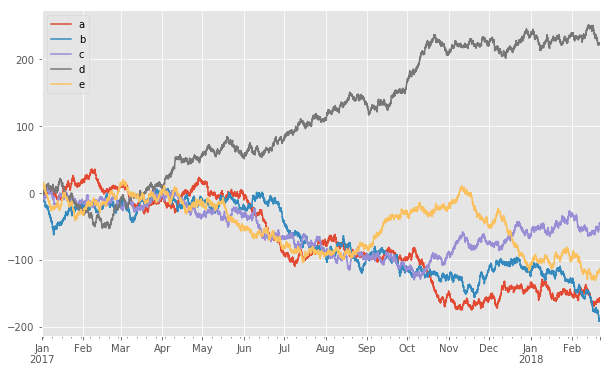

In [8]:
data.plot(figsize=(10, 6));

## Binary Storage

pandas allows to **efficiently store data** from a `DataFrame` object in binary format on disk using PyTables and the HDF5 database format. To this end, one uses the `HDFStore` function. The operation is simple and fast.

In [9]:
%%time
h5 = pd.HDFStore('data.h5', 'w')  # open database for writing
h5['data'] = data  # writing DataFrame object to database
h5.close()  # closing the database

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 15.9 ms


**Reading data** from such a database is similarly simple and fast.

In [10]:
%%time
h5 = pd.HDFStore('data.h5', 'r')  # open database for reading
data_copy = h5['data']  # reading DataFrame object from database
h5.close()  # closing the database

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 9.5 ms


In [11]:
data_copy.head()  # quick check whether data is the same ...

,a,b,c,d,e
2017-01-01 00:00:00,1.025,-1.790,-0.033,-0.214,-0.771
2017-01-01 01:00:00,1.169,-3.029,1.302,0.110,1.783
2017-01-01 02:00:00,0.476,-2.608,0.160,-0.032,2.869
2017-01-01 03:00:00,-0.897,-3.318,-1.527,-1.735,2.998
2017-01-01 04:00:00,-0.487,-4.460,-3.175,-2.216,0.381


## Data as CSV Files

Quite often, so-called **comma separated value (CSV)** files are used to exchange financial data. This text file based format can be processed by the majority of applications and languages used in practice. We first **export the data to a CSV file**.

In [12]:
%time data.to_csv('data.csv')

CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 42.8 ms


Let us **read with Python** the first few lines.

In [13]:
with open('data.csv') as f:  # open text file
    for i in xrange(5):  # iteration
        print f.readline()  # reading a line

,a,b,c,d,e

2017-01-01 00:00:00,1.025,-1.79,-0.033,-0.214,-0.771

2017-01-01 01:00:00,1.169,-3.029,1.302,0.11,1.783

2017-01-01 02:00:00,0.476,-2.608,0.16,-0.032,2.869

2017-01-01 03:00:00,-0.897,-3.318,-1.527,-1.735,2.998



**Reading data from a CSV file with pandas** is also straightforward.

In [14]:
%time data_csv = pd.read_csv('data.csv', index_col=0, parse_dates=True)

CPU times: user 24 ms, sys: 0 ns, total: 24 ms
Wall time: 25.8 ms


In [15]:
data_csv.head()

,a,b,c,d,e
2017-01-01 00:00:00,1.025,-1.790,-0.033,-0.214,-0.771
2017-01-01 01:00:00,1.169,-3.029,1.302,0.110,1.783
2017-01-01 02:00:00,0.476,-2.608,0.160,-0.032,2.869
2017-01-01 03:00:00,-0.897,-3.318,-1.527,-1.735,2.998
2017-01-01 04:00:00,-0.487,-4.460,-3.175,-2.216,0.381


## Data as Excel File

Another common use case is data storage and retrieval based on **Excel spreadsheet files**. Again, we start with the **export**. This operation is relatively slow.

In [16]:
%time data.to_excel('data.xlsx')

CPU times: user 1.08 s, sys: 36 ms, total: 1.12 s
Wall time: 1.15 s


Next, we **read the data with pandas** from the Excel file.

In [17]:
%time data_xlsx = pd.read_excel('data.xlsx')

CPU times: user 588 ms, sys: 0 ns, total: 588 ms
Wall time: 581 ms


In [18]:
data_xlsx.head()

,a,b,c,d,e
2017-01-01 00:00:00,1.025,-1.790,-0.033,-0.214,-0.771
2017-01-01 01:00:00,1.169,-3.029,1.302,0.110,1.783
2017-01-01 02:00:00,0.476,-2.608,0.160,-0.032,2.869
2017-01-01 03:00:00,-0.897,-3.318,-1.527,-1.735,2.998
2017-01-01 04:00:00,-0.487,-4.460,-3.175,-2.216,0.381


## File Check

Finally, a quick **check of the files** written.

In [19]:
!ls -n data.*

-rw-r--r-- 1 9276 33 590990 Jul 11 10:54 data.csv
-rw-r--r-- 1 9276 33 487400 Jul 11 10:54 data.h5
-rw-r--r-- 1 9276 33 453663 Jul 11 10:54 data.xlsx


And **cleaning up**.

In [20]:
!rm data.*

## Closing Remarks

This finishes the fifth module of the Python for Finance email course. In this module, you have learned:

* how to generate dummy data that resembles financial time series data
* how to store such data in binary format on disk using `pd.HDFStore` (PyTables, HDF5)
* how to export the data to a CSV file and how to read from such a file
* how to export the data to an Excel file and how to read from such a spreadsheet file

Input-Output operations are very important in the practice of quants, analysts and data scientists. This module introduces some of the most frequently seen use cases in finance, using pandas' powerful capabilities.

## Exercises

In order to master the material of this module, do the following:

* generate another data set (e.g. more columns, more/fewer rows)
* use a different `DatetimeIndex` object (e.g. minute frequency)
* look up all the parameters of the `pd.read_csv` and `pd.read_excel` functions in the documentation
* find a CSV file on the Internet containing financial (time series) data and import it to a `DataFrame` object; visualize this data
* work with PyTables directly and store the NumPy `ndarray` object in a respective database

## References

You find background information for the topics covered in this module in the following book:

* Hilpisch, Yves (2014): _Python for Finance_. O'Reilly, ch. 7.

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">team@tpq.io</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>